<a href="https://colab.research.google.com/github/RakshitDalvi/Iris-DataSet/blob/main/G6_Stock_Prediction_Practical_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
from datetime import date
import numpy as np
import pandas as pd
import yfinance as yf
from prophet import Prophet
from prophet.plot import plot_plotly
from plotly import graph_objs as go
from plotly.offline import iplot, plot

In [ ]:
START = "2015-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

In [ ]:
def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

**Stock Names: "AAPL", "GOOG", "MSFT", "GME", "TRIDENT.NS", "TATAPOWER.NS", "PERSISTENT.NS, "TSLA"**

In [ ]:
data = load_data(input())
print("Loading data...done!")
print("Raw Data")
data.tail()

TSLA
[*********************100%***********************]  1 of 1 completed
Loading data...done!
Raw Data


,Date,Open,High,Low,Close,Adj Close,Volume
1982,2022-11-15,195.880005,200.820007,192.059998,194.419998,194.419998,91293800
1983,2022-11-16,191.509995,192.570007,185.660004,186.919998,186.919998,66567600
1984,2022-11-17,183.960007,186.160004,180.899994,183.169998,183.169998,64336000
1985,2022-11-18,185.050003,185.190002,176.550003,180.190002,180.190002,75904900
1986,2022-11-21,175.850006,176.770004,167.539993,167.869995,167.869995,92650600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1987 non-null   datetime64[ns]
 1   Open       1987 non-null   float64       
 2   High       1987 non-null   float64       
 3   Low        1987 non-null   float64       
 4   Close      1987 non-null   float64       
 5   Adj Close  1987 non-null   float64       
 6   Volume     1987 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03
mean,87.761063,89.730643,85.591469,87.699471,87.699471,1.111591e+08
std,109.085806,111.599299,106.239398,108.932913,108.932913,8.058345e+07
min,9.488000,10.331333,9.403333,9.578000,9.578000,1.062000e+07
25%,16.142000,16.411666,15.878333,16.167334,16.167334,6.294525e+07
50%,21.606667,22.014668,21.271334,21.722000,21.722000,8.706330e+07
75%,184.616669,189.625000,179.930000,186.023331,186.023331,1.270954e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


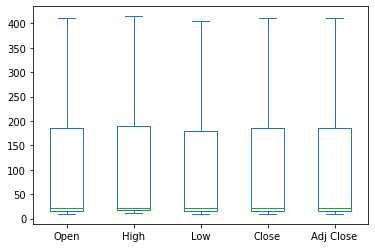

In [ ]:
# to visuallay represent outliers
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].plot(kind='box')

In [ ]:
fig = go.Figure( go.Scatter(x=data['Date'], y=data['Close'] ) )
fig.show()

In [ ]:
#Building the regression model

from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
X = np.array(data.index).reshape(-1,1)
Y = data['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=101)

In [ ]:
scaler = StandardScaler().fit(X_train)

Using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
import plotly.express as px

fig = px.scatter(data, x=X_train.T[0], y=Y_train)
fig.add_traces(go.Scatter(x=X_train.T[0], y=lm.predict(X_train), name='Predicted', mode='lines'))
fig.show()

In [ ]:
r2_train = r2_score(Y_train, lm.predict(X_train))
r2_test = r2_score(Y_test, lm.predict(X_test))

mse_train = mse(Y_train, lm.predict(X_train))
mse_test = mse(Y_test, lm.predict(X_test))

print('Training Error:')
r2_train, mse_train

Training Error:


(0.6576125604676574, 4103.834823136598)

In [ ]:
print('Testing Error:')
r2_test, mse_test

Testing Error:


(0.6226807791960883, 4362.681121333271)

**Using KNN**

In [ ]:
from sklearn import neighbors
from math import sqrt

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mse(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.9223905810318245
RMSE value for k=  2 is: 5.27386075126605
RMSE value for k=  3 is: 4.969284571343446
RMSE value for k=  4 is: 5.1752626195999385
RMSE value for k=  5 is: 5.283484257591832
RMSE value for k=  6 is: 5.531682141920604
RMSE value for k=  7 is: 5.700575531765695
RMSE value for k=  8 is: 5.941596369727038
RMSE value for k=  9 is: 6.2943018685035925
RMSE value for k=  10 is: 6.34691273146764
RMSE value for k=  11 is: 6.454983365127636
RMSE value for k=  12 is: 6.67409518896193
RMSE value for k=  13 is: 6.913336947548333
RMSE value for k=  14 is: 7.066052111086289
RMSE value for k=  15 is: 7.400641428136966
RMSE value for k=  16 is: 7.526343689672956
RMSE value for k=  17 is: 7.762665033078567
RMSE value for k=  18 is: 7.950801994603169
RMSE value for k=  19 is: 8.258679164558373
RMSE value for k=  20 is: 8.430384655609755


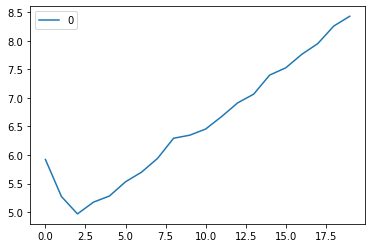

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
#plt.xlabel("K") #plt.ylabel("rmse_val")


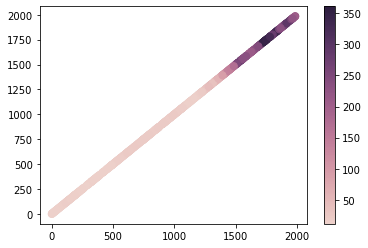

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test, X_test, c=model.predict(X_test), s=50, cmap=cmap
)
f.colorbar(points)
plt.show()
#plt.xlabel("X_test") #plt.ylabel("C")

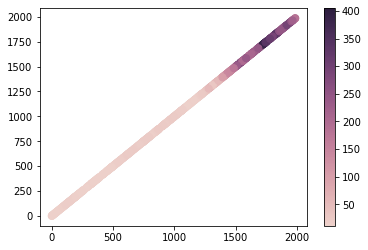

In [ ]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
     X_test, X_test, c=(Y_test), s=50, cmap=cmap
)
f.colorbar(points)
plt.show()
#plt.xlabel("X_test") #plt.ylabel("C")

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(neighbors.KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [ ]:
gridsearch.best_params_

{'n_neighbors': 2}

Performance evaluation of model

In [ ]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mse(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mse(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
train_rmse

2.735839653347407

**Forecasting Using Facebook Prophet**

In [ ]:
df_train = data[["Date", "Close"]]
df_train = df_train.rename(columns={"Date": "ds", "Close":"y"})

In [ ]:
m = Prophet()
m.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6kp6l50/p7viqzny.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpl6kp6l50/izsbji1u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73316', 'data', 'file=/tmp/tmpl6kp6l50/p7viqzny.json', 'init=/tmp/tmpl6kp6l50/izsbji1u.json', 'output', 'file=/tmp/tmpl6kp6l50/prophet_modelmtkunhb7/prophet_model-20221122074919.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:49:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:49:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=int(input("How many years to predict: "))*365)
forecast = m.predict(future)

How many years to predict: 1


In [ ]:
print("Forecast Data")
forecast.tail()

Forecast Data


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2347,2023-11-17,304.071957,260.077001,348.183696,278.841491,332.605110,-0.607303,-0.607303,-0.607303,-0.889386,-0.889386,-0.889386,0.282084,0.282084,0.282084,0.0,0.0,0.0,303.464655
2348,2023-11-18,304.120780,263.123419,350.799234,278.785217,332.750077,1.783116,1.783116,1.783116,0.769614,0.769614,0.769614,1.013502,1.013502,1.013502,0.0,0.0,0.0,305.903896
2349,2023-11-19,304.169603,265.966858,347.528697,278.668054,332.895043,2.591871,2.591871,2.591871,0.769615,0.769615,0.769615,1.822256,1.822256,1.822256,0.0,0.0,0.0,306.761475
2350,2023-11-20,304.218426,267.278936,349.412415,278.550892,333.040010,2.777396,2.777396,2.777396,0.079569,0.079569,0.079569,2.697826,2.697826,2.697826,0.0,0.0,0.0,306.995822
2351,2023-11-21,304.267249,269.988565,351.623279,278.442762,333.184976,3.503993,3.503993,3.503993,-0.123750,-0.123750,-0.123750,3.627743,3.627743,3.627743,0.0,0.0,0.0,307.771242


In [ ]:
fig1 = plot_plotly(m, forecast)
fig1

Forecast Components


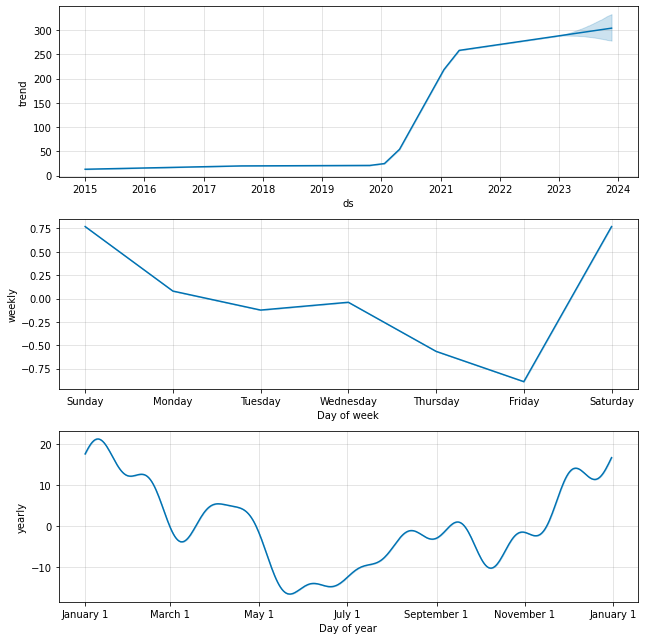

In [ ]:
print("Forecast Components")
fig2 = m.plot_components(forecast)